# Práctica 6 - Clasificador de imágenes con perceptrón

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para la práctica con el nombre NIP_P6_MLP.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook)

Imports necesarios para ejecutar el trabajo

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()

    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [ ]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
11490434/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [ ]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.7100 - accuracy: 0.8254 - val_loss: 0.4143 - val_accuracy: 0.8880
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3711 - accuracy: 0.9009 - val_loss: 0.3443 - val_accuracy: 0.9035
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.9104 - val_loss: 0.3174 - val_accuracy: 0.9107
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3043 - accuracy: 0.9162 - val_loss: 0.3036 - val_accuracy: 0.9145
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.9189 - val_loss: 0.2945 - val_accuracy: 0.9165
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9212 - val_loss: 0.2893 - val_accuracy: 0.9178
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.9229 - val_loss: 0.2857 - val_accuracy: 0.9172
Epoch 

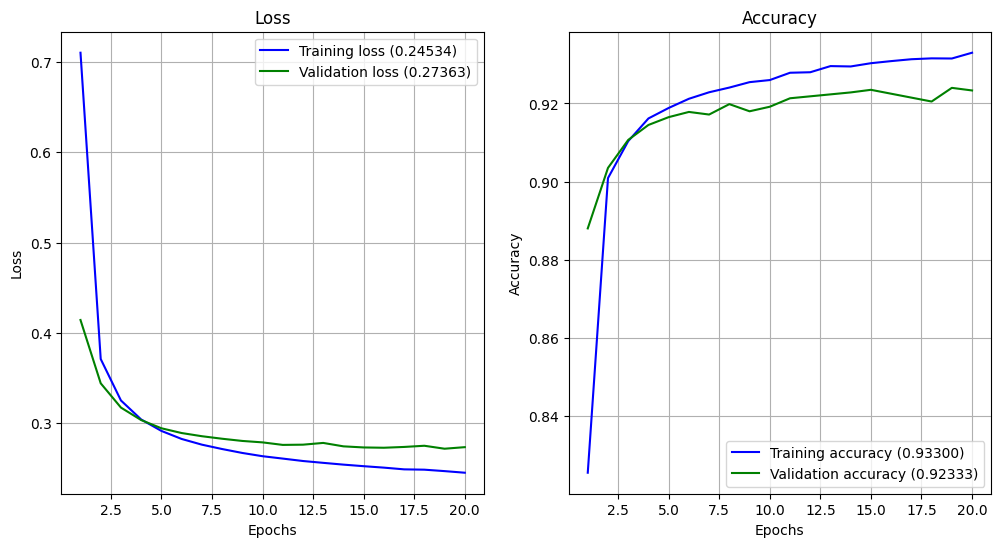

In [ ]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

## Preguntas a responder de la celda anterior


### 1 - ¿Qué representan los parámetros batch_size y epochs? (Respuesta dos líneas max).

Batch_size es el numero de parametros que se introducen para poder procesar y actualizar los pesos en el entrenamiento.

Epochs en cambio es el número de iteraciones en un conjunto de datos del entrenamiento cuando se hace la red neuronal.

### 2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.

La gráfica loss como su nombre indica es la pérdida, es decir, como va siendo el error en las predicciones a medida que se va haciendo la red.

La otra en cambio es justo lo opuesto, ya que muestra la evolución de la precisión mientras se forma la red.

Como se ve además loss va decrementando a la vez que accuracy va incrementando lo cual quiere decir que si se entrena demasiado la red podría verse muy ajustado al modelo de entrenamiento usado y perder eficacia con otros datos.

Evaluación de la red

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.22%
Accuracy test:   92.60%
313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization


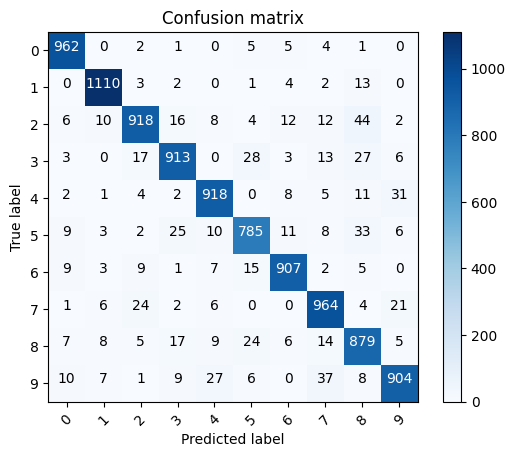

In [ ]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

## Preguntas a responder de la celda anterior

### 3 - Explica la gráfica que se muestra

Esta gráfica es la representación en forma de matriz de confusión de una red neuronal entrenada. Las partes de la filas hacen referencia a los datos reales y las de las columnas a los predichos.

Se aprecia además que el número más facil de reconocer es el 1 y el más difícil es el 5.

## TRABAJO PRÁCTICO


**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes.
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


4.1.   La mejor red obtenida para el caso de una capa

4.2.   La mejor red obtenida para el caso de dos capas

4.3.   La mejor red obtenida para el caso de tres capas

4.4.   Ejemplo de red en la que se produzca sobreajuste al entrenar

4.5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste

4.6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.

4.7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

In [ ]:
# CODIGO NECESARIO PARA RESPONDER LAS PREGUNTAS de la 4.1 a la 4.5

Respuesta 4.1

In [ ]:
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.6326 - accuracy: 0.8444 - val_loss: 0.3687 - val_accuracy: 0.8970
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.9056 - val_loss: 0.3208 - val_accuracy: 0.9100
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3084 - accuracy: 0.9139 - val_loss: 0.3032 - val_accuracy: 0.9147
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2940 - accuracy: 0.9181 - val_loss: 0.2952 - val_accuracy: 0.9183
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2854 - accuracy: 0.9206 - val_loss: 0.2898 - val_accuracy: 0.9177
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.9221 - val_loss: 0.2868 - val_accuracy: 0.9197
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.9243 - val_loss: 0.2829 - val_accuracy: 0.9195
Epoch 

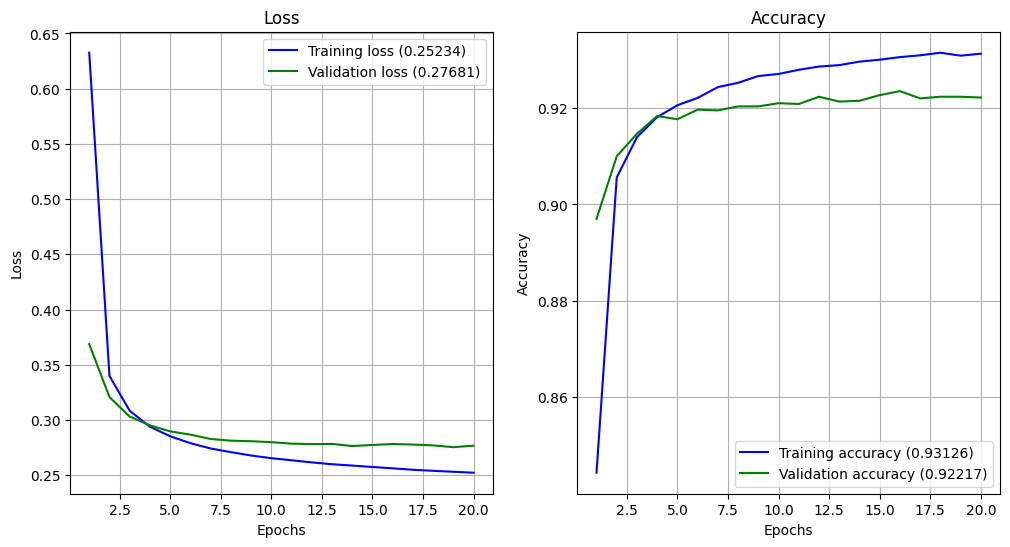

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

Accuracy train:  93.15%
Accuracy test:  92.64%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


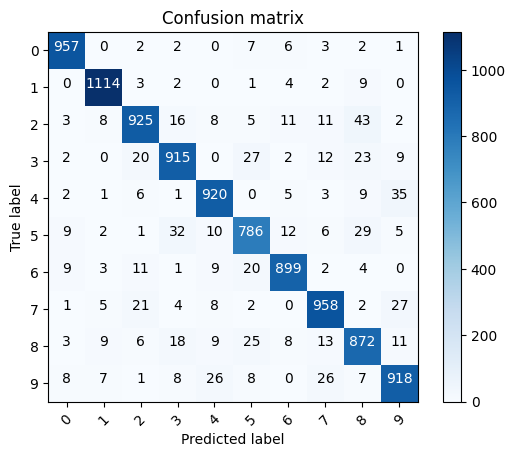

In [ ]:
#Finalmente hora de ver los resultados obtenidos
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%'))
print('%s %2.2f%s' % ('Accuracy test: ', 100*test_score[1], '%'))
y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Respuesta 4.2

In [ ]:
# Perceptron con una capa oculta.
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.5621 - accuracy: 0.8470 - val_loss: 0.3056 - val_accuracy: 0.9113
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2943 - accuracy: 0.9146 - val_loss: 0.2521 - val_accuracy: 0.9260
Epoch 3/20
422/422 [==============================] - 1s 4ms/step - loss: 0.2408 - accuracy: 0.9286 - val_loss: 0.2133 - val_accuracy: 0.9383
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2044 - accuracy: 0.9406 - val_loss: 0.1791 - val_accuracy: 0.9498
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1777 - accuracy: 0.9478 - val_loss: 0.1581 - val_accuracy: 0.9550
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1532 - accuracy: 0.9549 - val_loss: 0.1416 - val_accuracy: 0.9598
Epoch 7/20
422/422 [==============================] - 1s 4ms/step - loss: 0.1381 - accuracy: 0.9591 - val_loss: 0.1267 - val_accuracy: 0.9627
Epoch 

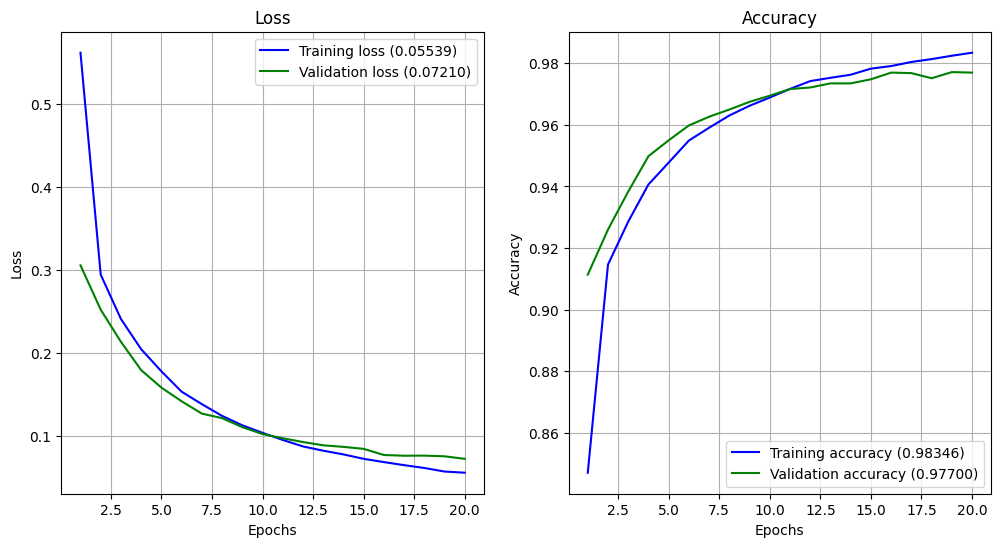

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[earlystop],
          verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

Accuracy train:  98.91%
Accuracy test:  97.78%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


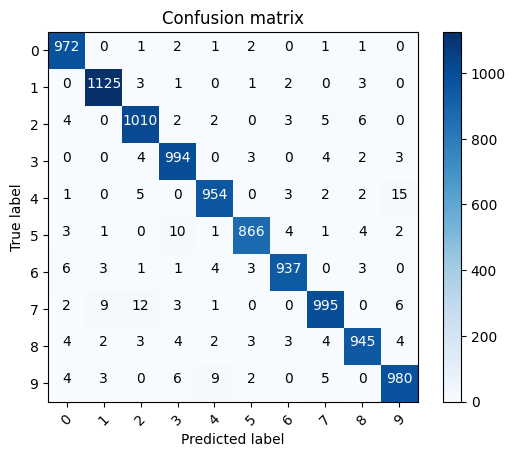

In [ ]:
#Finalmente hora de ver los resultados obtenidos
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%'))
print('%s %2.2f%s' % ('Accuracy test: ', 100*test_score[1], '%'))
y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Respuesta 4.3

In [ ]:
# Perceptron con dos capas ocultas.
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dense(256, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.6742 - accuracy: 0.8006 - val_loss: 0.3001 - val_accuracy: 0.9122
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2836 - accuracy: 0.9155 - val_loss: 0.2452 - val_accuracy: 0.9248
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2238 - accuracy: 0.9345 - val_loss: 0.1945 - val_accuracy: 0.9427
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1831 - accuracy: 0.9448 - val_loss: 0.1676 - val_accuracy: 0.9520
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1540 - accuracy: 0.9541 - val_loss: 0.1510 - val_accuracy: 0.9567
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1316 - accuracy: 0.9604 - val_loss: 0.1301 - val_accuracy: 0.9617
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1132 - accuracy: 0.9654 - val_loss: 0.1141 - val_accuracy: 0.9660
Epoch 

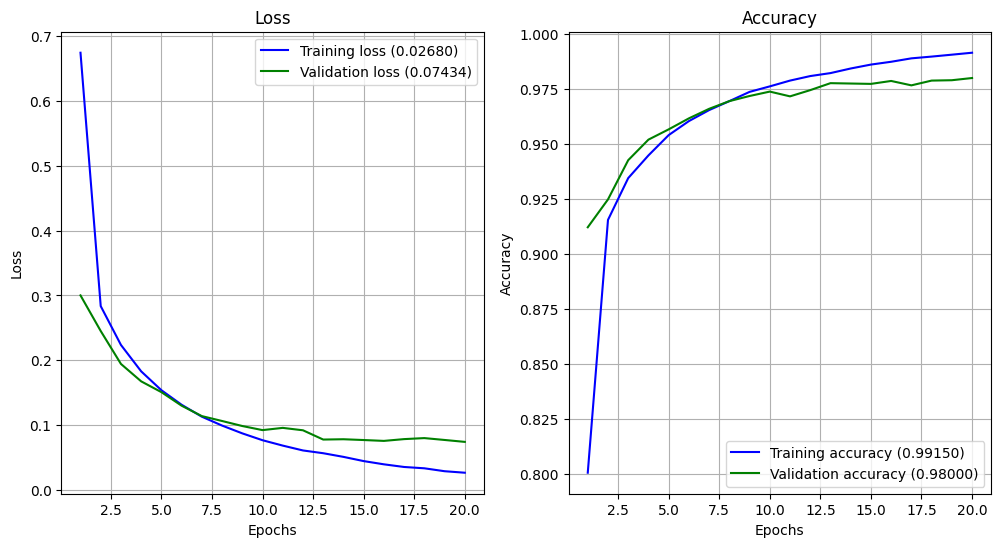

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[earlystop],
          verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

Accuracy train:  99.44%
Accuracy test:  97.97%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


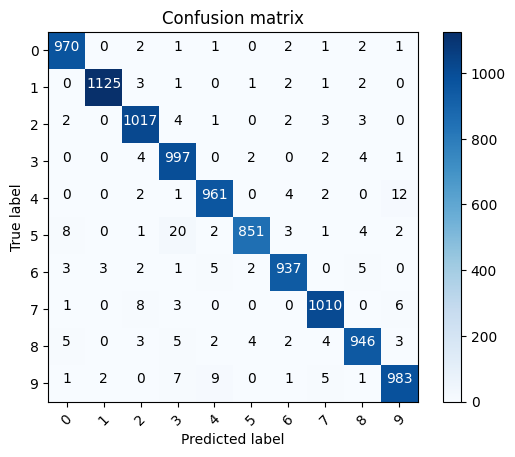

In [ ]:
#Finalmente hora de ver los resultados obtenidos
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%'))
print('%s %2.2f%s' % ('Accuracy test: ', 100*test_score[1], '%'))
y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Respuesta 4.4

In [ ]:
# Perceptron con una capa oculta.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3138 - accuracy: 0.9121 - val_loss: 0.1729 - val_accuracy: 0.9492
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1389 - accuracy: 0.9599 - val_loss: 0.1174 - val_accuracy: 0.9667
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9722 - val_loss: 0.0978 - val_accuracy: 0.9707
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0706 - accuracy: 0.9797 - val_loss: 0.0881 - val_accuracy: 0.9735
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0811 - val_accuracy: 0.9760
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0435 - accuracy: 0.9874 - val_loss: 0.0732 - val_accuracy: 0.9778
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 0.0790 - val_accuracy: 0.9755
Epoch 

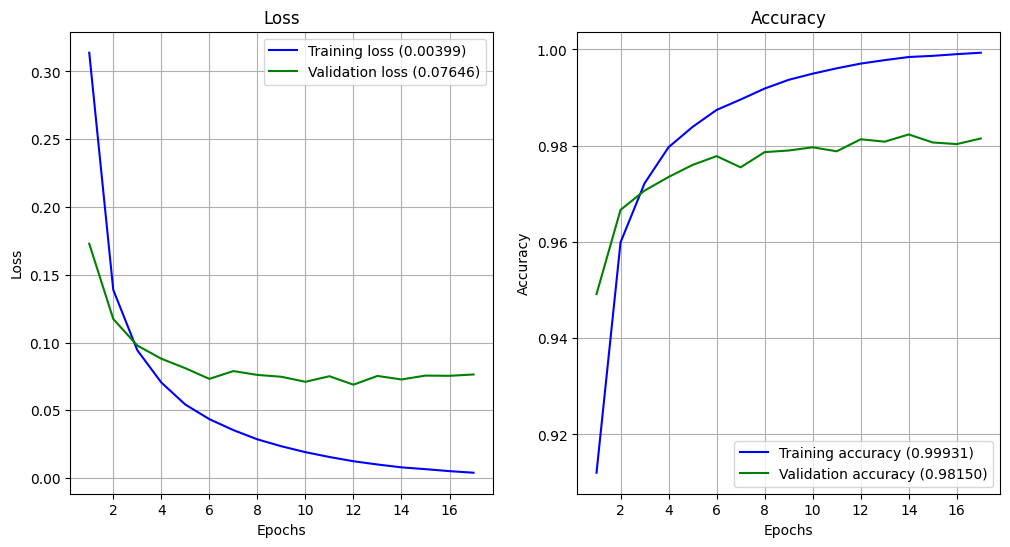

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[earlystop],
          verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

Respuesta 4.5

In [ ]:
from keras import regularizers
# Perceptron con una capa oculta.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(num_pixels,), kernel_regularizer = regularizers.l2(0.0)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3293 - accuracy: 0.9067 - val_loss: 0.1800 - val_accuracy: 0.9482
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1546 - accuracy: 0.9547 - val_loss: 0.1194 - val_accuracy: 0.9648
Epoch 3/20
422/422 [==============================] - 1s 4ms/step - loss: 0.1115 - accuracy: 0.9674 - val_loss: 0.0975 - val_accuracy: 0.9723
Epoch 4/20
422/422 [==============================] - 1s 4ms/step - loss: 0.0883 - accuracy: 0.9737 - val_loss: 0.0875 - val_accuracy: 0.9737
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.0747 - val_accuracy: 0.9765
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0757 - val_accuracy: 0.9777
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9833 - val_loss: 0.0750 - val_accuracy: 0.9790
Epoch 

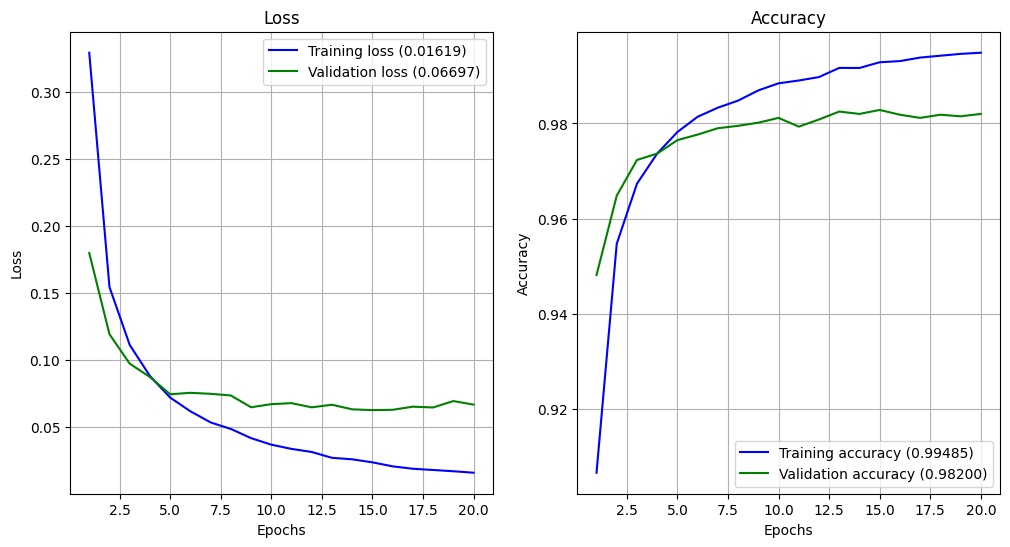

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[earlystop],
          verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

### 4 - Respuestas a las preguntas 4.6 y 4.7

Respuesta 4.6

Capas | Neuronas en capa 2 | Neuronas en capa 3 | Funcion salida | Funcion capa 2 | Funcion capa 3 | Algoritmo | Regularizer | Dropout | Accuracy | Es la mejor?
-------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------
1 | | | Sigmoidal | | | SGD | No | No | 0.9000 |
1 | | | Sigmoidal | | | RMSprop | No | No | 0.9227 |
1 | | | Softmax | | | SGD | No | No | 0.9002 |
1 | | | Softmax | | | RMSprop | No | No | 0.9315 | Si
2 | 128 | | Softmax | Relu | | RMSprop | No | No | 0.9648 |
2 | 128 | | Softmax | Sigmoidal | | RMSprop | No | No | 0.9773 |
2 | 256 | | Softmax | Sigmoidal | | RMSprop | No | No | 0.9723 |
2 | 256 | | Softmax | Sigmoidal | | RMSprop | No | Si | 0.9891 | Si
2 | 256 | | Softmax | Sigmoidal | | RMSprop | Si | Si | 0.9801 |
3 | 128 | 128 | Softmax | Sigmoidal | Sigmoidal | RMSprop | No | Si | 0.9789 |
3 | 128 | 128 | Softmax | Relu | Relu | RMSprop | No | Si | 0.9489 |
3 | 256 | 256 | Softmax | Sigmoidal | Sigmoidal | RMSprop | No | Si | 0.9944 | Si
3 | 256 | 128 | Softmax | Sigmoidal | Relu | RMSprop | Si | Si | 0.9777 |

Como se puede apreciar aquellas combinaciones que hayan sido las mejores están marcadas con un si en esa casilla y además se ha evitado hacer comprobaciones que en capas anteriores eran ineficientes al cambiar de capa, por eso por ejemplo a partir de la capa 2 se ha usado el mejor algoritmo y no se vuelven a usar los otros en las pruebas.

Respuesta 4.7

Dado que la mejor es la de 3 capas es la que se va a usar en la respuesta

In [ ]:
# Perceptron con dos capas ocultas.
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dense(256, activation='sigmoid', input_shape=(num_pixels,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.6725 - accuracy: 0.8001 - val_loss: 0.3161 - val_accuracy: 0.9045
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2793 - accuracy: 0.9165 - val_loss: 0.2359 - val_accuracy: 0.9318
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.2185 - accuracy: 0.9345 - val_loss: 0.1904 - val_accuracy: 0.9457
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1788 - accuracy: 0.9468 - val_loss: 0.1636 - val_accuracy: 0.9510
Epoch 5/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1509 - accuracy: 0.9551 - val_loss: 0.1418 - val_accuracy: 0.9590
Epoch 6/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1266 - accuracy: 0.9617 - val_loss: 0.1306 - val_accuracy: 0.9603
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9663 - val_loss: 0.1166 - val_accuracy: 0.9653
Epoch 

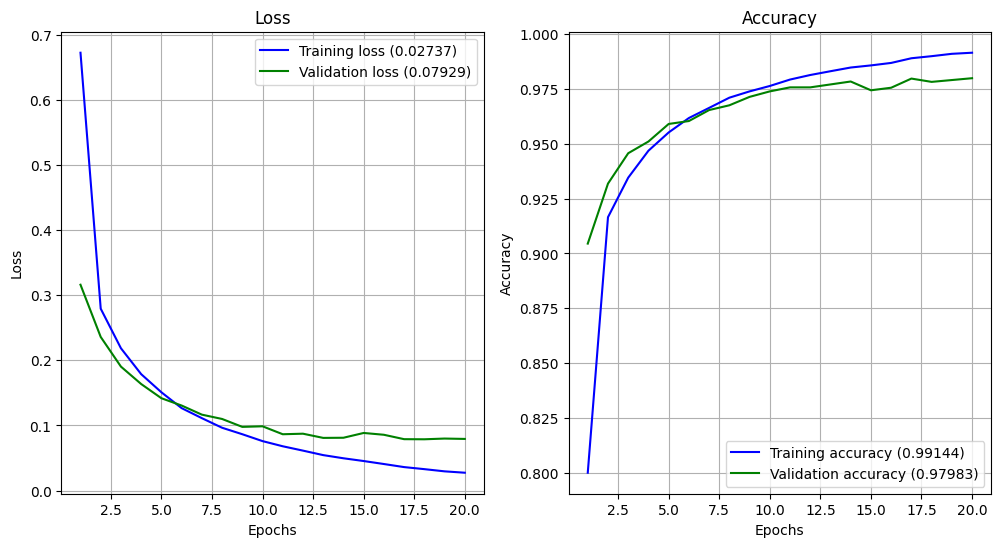

In [ ]:
#Entrenamiento de la red
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_split=0.1,
          callbacks=[earlystop],
          verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's'))
plot_history(history)

Accuracy train:  99.41%
Accuracy test:  97.93%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


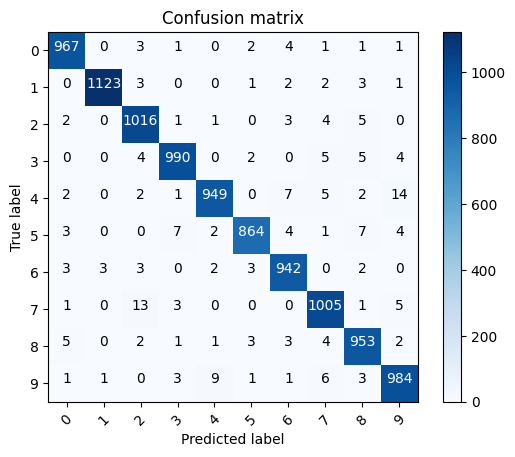

In [ ]:
#Finalmente hora de ver los resultados obtenidos
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%'))
print('%s %2.2f%s' % ('Accuracy test: ', 100*test_score[1], '%'))
y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

Una imagen mal clasificada es la número 18
El dígito predicho ha sido el 8, cuando realmente era un 3



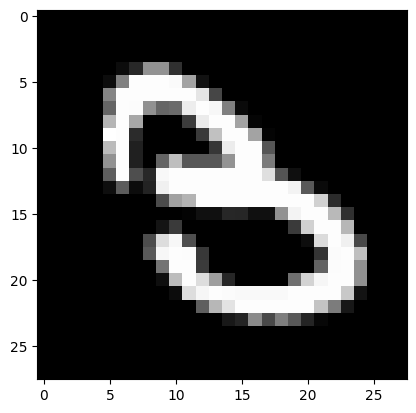

In [ ]:
for i in range(len(y_pred)):
  for j in range(10):
    if (max(y_pred[i]) == y_pred[i][j]):
      prediccion = j
  if (y_test[i][prediccion] == 0):
    numero = i
    break
for i in range(10):
  if (y_test[numero][i] == 1):
    real = i
    break

print("Una imagen mal clasificada es la número %d" % numero)
print("El dígito predicho ha sido el %d, cuando realmente era un %d\n" % (prediccion, real))
image = x_test[numero]
image = image.reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()